In [1]:
# reload magic

import pandas as pd
from pathlib import Path
import pandas as pd
import tqdm
from top2vec import Top2Vec

import pandas as pd
from pathlib import Path
import pandas as pd
from top2vec import Top2Vec
from sentence_transformers import SentenceTransformer


# Set Globals
PATH_TO_DATA = Path('data')
INDATA = 'meta_prop_sou.pkl'
PATH_TO_MODELS=Path('models')

In [2]:
df=pd.read_pickle(PATH_TO_DATA / INDATA)
df=df.set_index('dok_id') # Set correct index
df.head()

,rm,beteckning,doktyp,typ,subtyp,tempbeteckning,organ,mottagare,nummer,datum,systemdatum,titel,subtitel,status,relaterat_id
dok_id,,,,,,,,,,,,,,,
GM031,1998/99,1,prop,prop,prop,NaN,Finansdepartementet,NaN,1,1999-01-01 00:00:00,2006-10-23 14:13:40,Budgetpropositionen för 1999,"Förslag till statsbudget, finansplan m.m. (1. ...",NaN,NaN
GM0310,1998/99,10,prop,prop,prop,NaN,Justitiedepartementet,NaN,10,1999-01-01 00:00:00,2006-10-23 14:13:40,Ändringar i rättshjälpslagen,NaN,NaN,NaN
GM03100,1998/99,100,prop,prop,prop,NaN,Finansdepartementet,NaN,100,1999-01-01 00:00:00,2006-10-23 14:13:40,1999 års ekonomiska vårproposition,NaN,NaN,NaN
GM03100D1,1998/99,100D1,prop,prop,prop,100.1,Finansdepartementet,NaN,100,1999-01-01 00:00:00,2006-10-23 14:13:40,1999 års ekonomiska vårproposition,Svensk ekonomi,NaN,NaN
GM03100D2,1998/99,100D2,prop,prop,prop,100.2,Finansdepartementet,NaN,100,1999-01-01 00:00:00,2006-10-23 14:13:40,1999 års ekonomiska vårproposition,Avstämning av målet om en halverad öppen arbet...,NaN,NaN


In [4]:
# load Modell_sbertKB_titel.mod from PATH_TO_MODELS
model = Top2Vec.load(PATH_TO_MODELS / 'Modell_sbertKB_titel.mod')
# Set embedding model
sentence_model = SentenceTransformer('KBLab/sentence-bert-swedish-cased').encode
model.set_embedding_model(sentence_model)

# index document vectors
model.index_document_vectors()

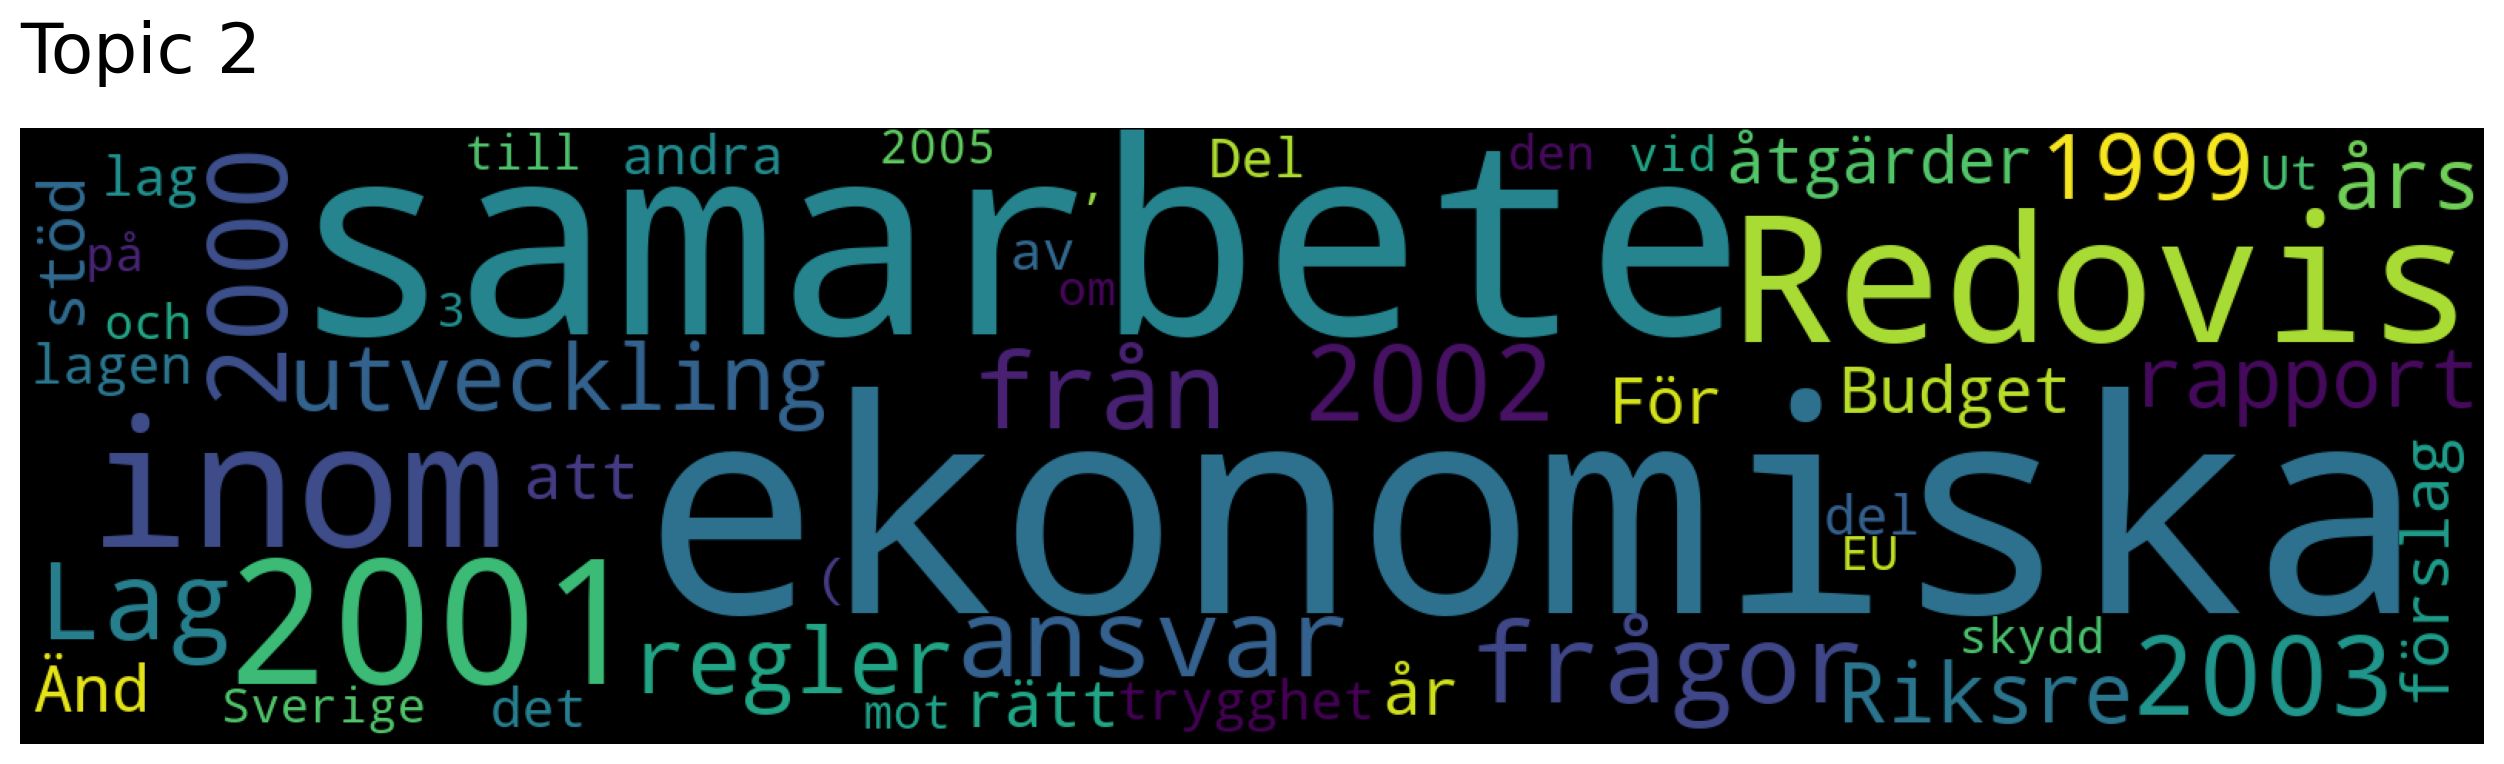

In [9]:
# Wordcloud on topic
model.generate_topic_wordcloud(2)

In [11]:
for w, s in zip(*model.similar_words(['ekonomiska'],10)):
    print(w,s)

samarbete 0.8986695252624008
inom 0.8861747243717215
frågor 0.8135737087580015
2001 0.8061879538535516
Redovis 0.7991544308920548
2000 0.7871167907579539
utveckling 0.7836482524640496
2003 0.773509227552392
från 0.7656601053980814
2002 0.747687779412618


In [12]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('KBLab/sentence-bert-swedish-cased').tokenize

In [16]:
# query text search the model
qt='Krisbudget för svensk stabilitet'
docs, scores, ids = model.query_documents(qt,10,use_index=True, tokenizer=tokenizer)

In [17]:
for doc, score, doc_id in zip(docs, scores, ids):
    print(f"Document: {doc_id}, Score: {score}, Title: {df.loc[doc_id,'titel']}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: GR031d32, Score: 0.7995935082435608, Title: Budgetpropositionen för 2004 Bilaga 2 Svensk ekonomi
-----------
Budgetpropositionen för 2004 Bilaga 2 Svensk ekonomi
-----------

Document: GQ031d31, Score: 0.7974355220794678, Title: Budgetpropositionen för  2003 Bilaga 2 Svensk ekonomi
-----------
Budgetpropositionen för  2003 Bilaga 2 Svensk ekonomi
-----------

Document: GW0361, Score: 0.7867900133132935, Title: Stabilitetsstärkande åtgärder för det svenska finansiella systemet
-----------
Stabilitetsstärkande åtgärder för det svenska finansiella systemet
-----------

Document: GV031d36, Score: 0.7862254977226257, Title: Budgetpropositionen för 2008 Bilaga 2 Svensk ekonomi
-----------
Budgetpropositionen för 2008 Bilaga 2 Svensk ekonomi
-----------

Document: GU031d32, Score: 0.7795471549034119, Title: Budgetpropositionen för 2007 Bilaga 2 Svensk ekonomi
-----------
Budgetpropositionen för 2007 Bilaga 2 Svensk ekonomi
-----------

Document: GP031d30, Score: 0.7785571217536926, 